# MNIST with sklearn

The goal of this exercise is to 
* explore some of the sklearn functionality for training a MLP classifier (see https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)  
* by using cross validation 
* learn how to compute the confusion matrix and its derived quantities and how to interpret them
* explore the test error as a function of the complexity (number of units, number of layers)
* explore the impact of L2 regularisation

__IMPORTANT REMARK__: We here follow the convention of sklearn to enumerate the samples with the first index. 

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

## Load and prepare the data 

In [3]:
datadir = '/Users/Apple/Documents/Deep Learning/Data'

In [4]:
def normalize(x_train,x_test):
    """
    Normalizes the pixels values of the images - mean and stdev are computed from the training set.
    
    Parameters:
    x_train -- Array of training samples of shape (n,m1) where n,m1 are the number of features and samples, respectively.  
    x_test -- Array of test samples of shape (n,m2) where n,m2 are the number of features and samples, respectively. 
    
    Returns:
    The arrays with the normalized train and test samples.  
    """
    mean = np.mean(x_train)
    std = np.std(x_train)
    x_train -= mean
    x_test -= mean
    x_train /= std
    x_test /= std
    return x_train, x_test

In [5]:
# in case you have trouble with the fetch_openml, use this code
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [6]:
x,y = fetch_openml('mnist_784', data_home=datadir, return_X_y=True)
x_train0, x_test0, y_train, y_test = train_test_split(x, y, test_size=10000, random_state=1)
x_train, x_test = normalize(x_train0, x_test0)

## Specify Model Family and learn how to compute the metrics

#### Model
Use the functionality of scikit learn to configure a MLP and its training procedure with
* hidden layers: 0-2 layers with suitable number of units per layer
* mini-batch gradient descent with given batch_size (no advanced optimisers)
* constant learning rate (no learning rate schedules)
* number of epochs
* no regularisation such as L2 penalty or early stopping

#### Metrics
Compute the train and test error resp. accuracy as well as the class precision, recall, f1-score.

__See__:
* https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier
* https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

## First Training Run

Run the training and plot the training loss with a first set of values:
* no hidden layers
* mini-batchsize: 64
* learning rate: 0.1
* 100 epochs

Compute the Metrics.
Which digits are hard to predict?  

#### MODEL

0.9289833333333334


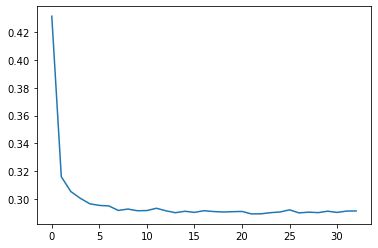

In [7]:
from sklearn.neural_network import MLPClassifier

# Basic Hyperparameters
hidden_layer_sizes = ()
batch_size = 64
learning_rate = 0.1
nepochs = 100

# Regularisation:
alpha = 0.0 # L2 regularisation constant
early_stopping = False
n_iter_no_change = 10

### START YOUR CODE ###
# Model instantiation and training

model = MLPClassifier(activation='relu', alpha=learning_rate, batch_size=batch_size, early_stopping=False,
       hidden_layer_sizes=(),
       max_iter=100)

model.fit(x_train0, y_train)


# Plot loss curve

print (model.score(x_train0,y_train))
plt.plot(model.loss_curve_)



### END YOUR CODE ###

#### METRICS

In [8]:
### START YOUR CODE ###

# train and test error, accuracy
# per class accuracy, precision, f1 score

from sklearn.metrics import accuracy_score, classification_report

pred_train = model.predict(x_train0)
pred_test = model.predict(x_test0)


print("Train Acc:", accuracy_score(y_train, pred_train))
print("Test Acc:", accuracy_score(y_test, pred_test))

print(classification_report(y_test,pred_test))




### END YOUR CODE ###

Train Acc: 0.9289833333333334
Test Acc: 0.9154
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       959
           1       0.96      0.96      0.96      1186
           2       0.94      0.89      0.91      1035
           3       0.90      0.89      0.89      1031
           4       0.91      0.91      0.91       941
           5       0.91      0.85      0.88       930
           6       0.93      0.96      0.94       942
           7       0.94      0.93      0.93      1050
           8       0.83      0.91      0.87       936
           9       0.87      0.91      0.89       990

    accuracy                           0.92     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.92      0.92     10000



## Best Model without Hidden Layer

By first varying just the parameters 
* mini-batchsize
* learning rate
* epochs

with adding any hidden layer.

Summarize what the best combination of the abover hyper-parameters is.

In [9]:
### START YOUR CODE ###

# Keep hidden_layer_sizes = () 
# Vary the following

batch_size = 64
learning_rate = 0.1
nepochs = 100

model = MLPClassifier(hidden_layer_sizes = ())

parameter_space = {
    'alpha': [0.01, 0.1, 0.2, 0.5],
    'batch_size' : [32, 64],
    'max_iter' : [50, 100] #epochs ?
}

from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(model, parameter_space, n_jobs=-1, cv=3)
clf.fit(x_train0, y_train) 


### END YOUR CODE ###

/Users/Apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=3, estimator=MLPClassifier(hidden_layer_sizes=()), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 0.2, 0.5], 'batch_size': [32, 64],
                         'max_iter': [50, 100]})

In [13]:
clf.best_params_

{'alpha': 0.01, 'batch_size': 64, 'max_iter': 50}

In [14]:
clf.best_score_

0.9181666666666667

In [15]:
train_error = clf.score(x_train0, y_train)
test_error = clf.score(x_test0, y_test)

print (train_error, test_error)

0.9361333333333334 0.9164


__BEST MODEL__ (no hidden layer)

batch_size = 64

learning_rate = 0.1

nepochs = 50

train / validation error : 0.93613 / 0.9164

## Adding one Hidden layer

Explore the performance of the model by varying the parameters 
* mini-batchsize
* learning rate
* epochs
* complexity (number of units in the one hidden layer)

For given complexity, summarize what the best combination of other hyper-parameters is - compute this for several complexities.

Compute also the "best" train and validation error (or accuracy) for given complexity - as a function of the complexity and plot the curve (for selected number of units - e.g. 10 different values). 


In [ ]:
### START YOUR CODE ###

# Keep hidden_layer_sizes = () 
# Vary the following

hidden_layer_sizes = [(20,), (50,), (100,)] # just one layer 
batch_size = [32,64]
learning_rate = [0.01, 0.1, 0.2]
nepochs = [100, 150, 200]

model = MLPClassifier()
score = 'accuracy'

parameter_space = {
    'hidden_layer_sizes': hidden_layer_sizes,
    'alpha': learning_rate,
    'batch_size' : batch_size,
    'max_iter' : nepochs
}

from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(MLPClassifier(solver="adam"), parameter_space, scoring=score, cv=3, n_jobs=-1)
clf.fit(x_train0, y_train)


print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
results = clf.cv_results_
for i in range(len(results["params"])):
    print("%0.3f (+/-%0.03f) for %r" % (results["mean_test_score"][i], results["std_test_score"][i] * 2, results["params"][i]))


### END YOUR CODE ###

In [47]:
model.get_params().keys()

dict_keys(['activation', 'alpha', 'batch_size', 'beta_1', 'beta_2', 'early_stopping', 'epsilon', 'hidden_layer_sizes', 'learning_rate', 'learning_rate_init', 'max_fun', 'max_iter', 'momentum', 'n_iter_no_change', 'nesterovs_momentum', 'power_t', 'random_state', 'shuffle', 'solver', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [ ]:
print('Best parameters found:\n', clf.best_params_)
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    

In [ ]:
y_true, y_pred = y_test , clf.predict(X_test)
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

In [ ]:
#fill them after you get the best parameters
#batch_size = 
#alpha =
#max_iter =

clf = MLPClassifier(hidden_layer_sizes=(100,), solver="adam", batch_size=batch_size, learning_rate_init=alpha, max_iter=max_iter)
clf.fit(x_train0, y_train)

train_error = clf.score(x_train0, y_train)
test_error = clf.score(x_test0, y_test)

print (train_error, test_error)

__Error vs Complexity__:

Plot with the train and test error vs complexity (number of units in the hidden layer)

In [ ]:
model = MLPClassifier()

parameter_space = {
    'hidden_layer_sizes': [(100,), (50,), (10,), (5,)]
}

from sklearn.model_selection import GridSearchCV
clf2 = GridSearchCV(model, parameter_space, n_jobs=-1, cv=5)
clf2.fit(x_train0, y_train) # X is train samples and y is the corresponding labels



#change into the bests
#batch_size = 
#learning_rate = 
#nepochs = 

complexity = [10, 20, 50, 100]
train_errors = []
test_errors = []

for i in complexity:
    mlp = MLPClassifier(hidden_layer_sizes = (i,), batch_size=batch_size, learning_rate_init=learning_rate, max_iter=nepochs)
    mlp.fit(x_train0, y_train)
    test_errors.append(mlp.score(x_test0, y_test))
    train_errors.append(mlp.score(x_train0, y_train))




In [1]:
### START YOUR CODE ###

plt.plot(complexity, train_errors, label="train error")
plt.plot(complexity, test_errors, label="test error")
plt.xlabel('Model Complexity')
plt.legend()

### END YOUR CODE ###

__BEST MODEL__ (one hidden layer)

hidden_layer_sizes = (100,)

batch_size = 64

learning_rate = 0.01 

nepochs = 200 

train / validation error :


## Impact of Regularisation

Explore the Impact of Using L2 Regularisation (still adding just one hidden layer) again by varying mini-batchsize, learning rate, epochs, complexity.

Can you reach a better best model performance (on validation set)?

In [3]:
### START YOUR CODE ###

# Vary the following

# Basic Hyperparameters
hidden_layer_sizes = (100,)
batch_size = 64
learning_rate = 0.1
nepochs = 100

# Regularisation:
alpha = 0.2 # L2 regularisation constant



model3 = MLPClassifier(alpha = alpha)

parameter_space = {
    'hidden_layer_sizes': [(100,), (50,), (10,), (5,)],
    'learning_rate': [0.01, 0.1, 0.5],
    'batch_size' : [32, 64],
    'max_iter' : [50, 100] #epochs ?
}


score = 'accuracy'

clf = GridSearchCV(MLPClassifier(solver="adam", alpha=alpha), parameter_space, scoring=score, cv=3, n_jobs=-1)
clf.fit(x_train0, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
results = clf.cv_results_
for i in range(len(results["params"])):
    print("%0.3f (+/-%0.03f) for %r" % (results["mean_test_score"][i], results["std_test_score"][i] * 2, results["params"][i]))


### END YOUR CODE ###

In [ ]:
batch_size =
learning_rate =
max_iter = 

clf = MLPClassifier(hidden_layer_sizes=(50,), solver="adam", batch_size=batch_size, learning_rate_init=learning_rate, max_iter=100, alpha=0.2)
clf.fit(x_train0, y_train)

train_error = clf.score(x_train0, y_train)
test_error = clf.score(x_test0, y_test)

print (train_error, test_error)

__Error vs Complexity__:

Plot with the train and test error vs complexity (number of units in the hidden layer)

In [2]:
### START YOUR CODE ###

batch_size = 
learning_rate = 
nepochs = 
alpha = 0.2

complexity = [10, 20, 50, 100]
train_errors = []
test_errors = []

for i in complexity:
    mlp = MLPClassifier(hidden_layer_sizes = (i,), solver="adam", batch_size=batch_size, alpha=alpha, learning_rate_init=learning_rate, max_iter=nepochs)
    mlp.fit(x_train0, y_train)
    test_errors.append(mlp.score(x_test0, y_test))
    train_errors.append(mlp.score(x_train0, y_train))


### END YOUR CODE ###

In [ ]:
plt.plot(complexity, train_errors, label="train error")
plt.plot(complexity, test_errors, label="test error")
plt.xlabel('Model Complexity')
plt.legend()

__BEST MODEL__ (one hidden layer)

hidden_layer_sizes = (*,)

batch_size = 

learning_rate = 

nepochs = 

alpha =  # L2 regularisation constant

train / validation error :

## Adding up to 3 Hidden Layers

Now consider using a model with more than one hidden layer (at max 3).


In [3]:
### START YOUR CODE ###

# Vary the following

# Basic Hyperparameters
hidden_layer_sizes = (100,0,0)
batch_size = 64
learning_rate = 0.1
nepochs = 100

# Regularisation:
alpha = 0.0 # L2 regularisation constant

### END YOUR CODE ###

__Error vs Complexity__:

Plot with the train and test error vs complexity (number of units in the hidden layer)

In [2]:
### START YOUR CODE ###

parameter_space = {'hidden_layer' : [(20,), (50,), (100,), 
                (20,20,), (20,50,), (20,100,), 
                (20,20,20,), (20,20,50,), (20,20,100,)]
               }


score = 'accuracy'

clf = GridSearchCV(MLPClassifier(solver="adam", batch_size=batch_size, learning_rate_init=learning_rate,
                                max_iter=nepochs), parameter_space, scoring=score, cv=3, n_jobs=-1)
clf.fit(x_train0, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
results = clf.cv_results_
for i in range(len(results["params"])):
    print("%0.3f (+/-%0.03f) for %r" % (results["mean_test_score"][i], results["std_test_score"][i] * 2, results["params"][i]))




### END YOUR CODE ###

__BEST MODEL__ (1-3 hidden layers)

hidden_layer_sizes = (*,*,*)

batch_size = 

learning_rate = 

nepochs = 

alpha =  # L2 regularisation constant

train / validation error :

## Test Performance of Best Model

Test Error: 

In [ ]:
hidden_layer =

clf = MLPClassifier(hidden_layer_sizes=hidden_layer, solver="adam", batch_size=batch_size, 
                    learning_rate_init=learning_rate, max_iter=nepochs, alpha=alpha)
clf.fit(x_train0, y_train)

train_error = clf.score(x_train0, y_train)
test_error = clf.score(x_test0, y_test)

print (train_error, test_error)